In [ ]:
pip install basedosdados

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import basedosdados as bd

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

## Dados sobre escolas presente no diretórios brasileiros da Base dos Dados

fonte: https://basedosdados.org/dataset/br-bd-diretorios-brasil?bdm_table=escola

In [5]:
df_esc = bd.read_table(dataset_id='br_bd_diretorios_brasil',
table_id='escola',
billing_project_id="ps-analytica-a2")

Downloading: 100%|█████████████████████████████████████████████████████████| 218117/218117 [01:20<00:00, 2725.00rows/s]


In [6]:
df_esc

,id_escola,nome,id_municipio,sigla_uf,restricao_atendimento,localizacao,localidade_diferenciada,categoria_administrativa,endereco,telefone,dependencia_administrativa,categoria_privada,conveniada_poder_publico,regulacao_conselho_educacao,porte,etapas_modalidades_oferecidas,outras_ofertas_educacionais,latitude,longitude
0,11000023,EEEE ABNAEL MACHADO DE LIMA - CENE,1100205,RO,ESCOLA ATENDE EXCLUSIVAMENTE ALUNOS COM DEFICI...,Urbana,A escola não está em área de localização difer...,Pública,"AVENIDA AMAZONAS, 6492 ZONA LESTE. TIRADENTES....",(69) 992083054,Estadual,Não Informado,Não,Não,Entre 51 e 200 matrículas de escolarização,Ensino Fundamental,Atendimento Educacional Especializado,-8.758459,-63.8540109
1,11000040,EMEIEF PEQUENOS TALENTOS,1100205,RO,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Urbana,A escola não está em área de localização difer...,Pública,"RUA CAETANO, 3256 PREDIO. CALADINHO. 76808-108...",(69) 32274273,Municipal,Não Informado,Não,Sim,Entre 201 e 500 matrículas de escolarização,Educação Infantil,None,-8.79373016,-63.88391863
2,11000058,CENTRO DE ENSINO CLASSE A,1100205,RO,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Urbana,A escola não está em área de localização difer...,Privada,"AVENIDA CARLOS GOMES, 1135 CENTRO. 76801-123 P...",(69) 32244473,Privada,Particular,Não,Sim,Mais de 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental, Ensino ...",None,-8.7607343,-63.9019859
3,11000082,CENTRO EDUCACIONAL PRESBITERIANO 15 DE NOVEMBRO,1100205,RO,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Urbana,A escola não está em área de localização difer...,Privada,"RUA ALMIRANTE BARROSO, 1483 SANTA BARBARA. 768...",(69) 32245636,Privada,Particular,Não,Sim,Entre 51 e 200 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",None,-8.765205,-63.8961767
4,11000104,CENTRO EDUC CORA CORALINA,1100205,RO,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Urbana,A escola não está em área de localização difer...,Privada,"RUA MEXICO, 1056 NOVA PORTO VELHO. 76820-190 P...",(69) 32252616,Privada,Particular,Não,Sim,Entre 501 e 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",None,-8.7686325,-63.8754712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218112,53084071,ESC DIVINO MESTRE,5300108,DF,ESCOLA PARALISADA,Urbana,Não Informado,Privada,"QUADRA QNP 21 CONJUNTO H, CEILANDIA NORTE CEIL...",(61) 35856361,Privada,Não Informado,Não,None,None,None,None,None,None
218113,53085000,COBIAN - COL BIANGULO,5300108,DF,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Urbana,A escola não está em área de localização difer...,Privada,"QNJ 22 - LOTES 34 E 36, TAGUATINGA NORTE. 7214...",(61) 34756945,Privada,Particular,Não,Sim,Entre 201 e 500 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",None,-15.815942,-48.0851085
218114,53086007,CED VITORIA REGIA,5300108,DF,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,Urbana,A escola não está em área de localização difer...,Privada,"RUA 07 CH 333 LOTE 333/E, SETOR HABITACIONAL V...",(61) 35976668,Privada,Particular,Não,Sim,Entre 51 e 200 matrículas de escolarização,"Ensino Fundamental, Ensino Médio",None,None,None
218115,53087003,CED SANTOS DUMONT - CESAN,5300108,DF,ESCOLA PARALISADA,Urbana,Não Informado,Privada,"QUADRA 203 CONJUNTO 6, 06/15 LOTES 06 E 15. SE...",(61) 33391545,Privada,Não Informado,Não,None,None,None,None,None,None


## Selecionando apenas as colunas necessárias

In [7]:
df_esc0 = df_esc.iloc[:,[0,2,5,7]]

## Utilizando a coluna id_escola como index

In [8]:
df_esc1 = df_esc0.set_index("id_escola")

In [9]:
#garantindo que não há nenhum id de escola repetido na tabela com as informações de localização

duplicas = df_esc1.pivot_table(index = ['id_escola'], aggfunc ='size')
print(duplicas.max())

1


In [10]:
df_esc1

,id_municipio,localizacao,categoria_administrativa
id_escola,,,
11000023,1100205,Urbana,Pública
11000040,1100205,Urbana,Pública
11000058,1100205,Urbana,Privada
11000082,1100205,Urbana,Privada
11000104,1100205,Urbana,Privada
...,...,...,...
53084071,5300108,Urbana,Privada
53085000,5300108,Urbana,Privada
53086007,5300108,Urbana,Privada


## Dados do Ideb a nível escolar 

fonte: https://basedosdados.org/dataset/br-inep-ideb?bdm_table=escola

In [11]:
df1 = bd.read_table(dataset_id='br_inep_ideb',
table_id='escola',
billing_project_id="ps-analytica-a2")

Downloading: 100%|███████████████████████████████████████████████████████| 1030805/1030805 [02:46<00:00, 6186.20rows/s]


In [12]:
# Excluindo colunas não necessárias

df1 = df1.drop(columns=["taxa_aprovacao", "indicador_rendimento","nota_saeb_matematica","nota_saeb_lingua_portuguesa","nota_saeb_media_padronizada","projecao"])

In [13]:
df1["localizacao"] = np.nan

In [14]:
## A coluna 'localizacao' foi criada para receber a localizacao da outra tabela com base no 'id_escola'
df1

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao
0,2005,AC,1200104,12016284,estadual,fundamental,finais (6-9),1.9,NaN
1,2005,AC,1200328,12005126,municipal,fundamental,iniciais (1-5),2.4,NaN
2,2005,AC,1200336,12001961,estadual,fundamental,iniciais (1-5),2.4,NaN
3,2005,AC,1200336,12002046,estadual,fundamental,iniciais (1-5),2.4,NaN
4,2005,AC,1200336,12002267,municipal,fundamental,finais (6-9),2.3,NaN
...,...,...,...,...,...,...,...,...,...
1030800,2021,MG,3148103,31199818,municipal,fundamental,finais (6-9),6.2,NaN
1030801,2021,MG,3169307,31174386,estadual,fundamental,finais (6-9),6.2,NaN
1030802,2021,SP,3538709,35020771,estadual,fundamental,finais (6-9),6.2,NaN
1030803,2021,GO,5205901,52065570,municipal,fundamental,finais (6-9),6.2,NaN


## Selecionando apenas as linhas das quais podemos ter informação de sua localização

In [15]:
df2 = df1[df1["id_escola"].isin(list(df_esc1.index.values))]

In [16]:
df2

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao
0,2005,AC,1200104,12016284,estadual,fundamental,finais (6-9),1.9,NaN
1,2005,AC,1200328,12005126,municipal,fundamental,iniciais (1-5),2.4,NaN
2,2005,AC,1200336,12001961,estadual,fundamental,iniciais (1-5),2.4,NaN
3,2005,AC,1200336,12002046,estadual,fundamental,iniciais (1-5),2.4,NaN
4,2005,AC,1200336,12002267,municipal,fundamental,finais (6-9),2.3,NaN
...,...,...,...,...,...,...,...,...,...
1030799,2021,MS,5002704,50006304,municipal,fundamental,iniciais (1-5),6.2,NaN
1030800,2021,MG,3148103,31199818,municipal,fundamental,finais (6-9),6.2,NaN
1030801,2021,MG,3169307,31174386,estadual,fundamental,finais (6-9),6.2,NaN
1030802,2021,SP,3538709,35020771,estadual,fundamental,finais (6-9),6.2,NaN


## Utilizando a tabela dos diretório brasileiros para obter a localização das escolas para a tabela do Ideb

In [17]:
df2_gp = df2.groupby(by="id_escola")  

for key, item in df2_gp:
    local = df_esc1.loc[[str(key)],["localizacao"]].iloc[0,0]
    df2.loc[df2["id_escola"] == str(key),"localizacao"] = local

In [18]:
# Verificando se as strings de 'Urbana' e 'Rural' são as únicas na coluna

df2["localizacao"].unique()

array(['Urbana', 'Rural'], dtype=object)

In [19]:
#Verificando se todas as linhas foram preenchidas

df2[pd.notnull(df2["localizacao"])]

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao
0,2005,AC,1200104,12016284,estadual,fundamental,finais (6-9),1.9,Urbana
1,2005,AC,1200328,12005126,municipal,fundamental,iniciais (1-5),2.4,Urbana
2,2005,AC,1200336,12001961,estadual,fundamental,iniciais (1-5),2.4,Urbana
3,2005,AC,1200336,12002046,estadual,fundamental,iniciais (1-5),2.4,Urbana
4,2005,AC,1200336,12002267,municipal,fundamental,finais (6-9),2.3,Urbana
...,...,...,...,...,...,...,...,...,...
1030799,2021,MS,5002704,50006304,municipal,fundamental,iniciais (1-5),6.2,Urbana
1030800,2021,MG,3148103,31199818,municipal,fundamental,finais (6-9),6.2,Rural
1030801,2021,MG,3169307,31174386,estadual,fundamental,finais (6-9),6.2,Urbana
1030802,2021,SP,3538709,35020771,estadual,fundamental,finais (6-9),6.2,Urbana


In [20]:
# Utilizar apenas dados dos quais temos o ideb preenchido

df3 = df2[pd.notnull(df2["ideb"])]

In [23]:
df3

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao
0,2005,AC,1200104,12016284,estadual,fundamental,finais (6-9),1.9,Urbana
1,2005,AC,1200328,12005126,municipal,fundamental,iniciais (1-5),2.4,Urbana
2,2005,AC,1200336,12001961,estadual,fundamental,iniciais (1-5),2.4,Urbana
3,2005,AC,1200336,12002046,estadual,fundamental,iniciais (1-5),2.4,Urbana
4,2005,AC,1200336,12002267,municipal,fundamental,finais (6-9),2.3,Urbana
...,...,...,...,...,...,...,...,...,...
1030799,2021,MS,5002704,50006304,municipal,fundamental,iniciais (1-5),6.2,Urbana
1030800,2021,MG,3148103,31199818,municipal,fundamental,finais (6-9),6.2,Rural
1030801,2021,MG,3169307,31174386,estadual,fundamental,finais (6-9),6.2,Urbana
1030802,2021,SP,3538709,35020771,estadual,fundamental,finais (6-9),6.2,Urbana


In [21]:
df3_urb = df3[df3["localizacao"] == "Urbana"]

In [22]:
# Poucos dados da rede privada

df3[df3["rede"] == "privada"]

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao
29731,2017,AM,1302603,13026402,privada,medio,todos (1-4),7.6,Urbana
29850,2017,AP,1600154,16006437,privada,medio,todos (1-4),2.3,Rural
29905,2017,BA,2905206,29241391,privada,medio,todos (1-4),7.4,Urbana
29935,2017,BA,2909802,29454000,privada,medio,todos (1-4),7.2,Urbana
29943,2017,BA,2910800,29093619,privada,medio,todos (1-4),6.9,Urbana
...,...,...,...,...,...,...,...,...,...
1027505,2017,SP,3537107,35150964,privada,medio,todos (1-4),6.2,Urbana
1027514,2017,SP,3538709,35113712,privada,medio,todos (1-4),6.2,Urbana
1027527,2017,SP,3541406,35117092,privada,medio,todos (1-4),6.2,Urbana
1027675,2017,SP,3554003,35112045,privada,medio,todos (1-4),6.2,Urbana


In [24]:
df3_urb.groupby(by="ano").mean()

,ideb
ano,
2005,3.512361
2007,3.833448
2009,4.203359
2011,4.450553
2013,4.581084
2015,4.892309
2017,5.109662
2019,5.172894
2021,5.305225


In [25]:
df3_rur = df3[df3["localizacao"] == "Rural"]

In [26]:
df3_rur.groupby(by="ano").mean()

,ideb
ano,
2005,3.092206
2007,3.470643
2009,3.466896
2011,3.740431
2013,3.791437
2015,4.176431
2017,4.470475
2019,4.619324
2021,4.737663


In [29]:
def plotar2(lista, y, titulo):
    fig, ax = plt.subplots(figsize = (16,8))
    for data in lista:
        ax.plot(data.index.values, data[y])
    plt.title(titulo, fontsize=18)
    plt.xticks(range(2005, 2022, 2))
    ax.legend(["Urbana", "Rural"], loc = "lower right", fontsize = 15)
    ax.set_xlabel("Ano", size = 16)
    ax.set_ylabel("Ideb", size = 16)
    ax.grid(True)
    #plt.savefig("C:\\Users\\Igor\\Desktop\\plots\\" + nome, dpi=300)
    plt.show()

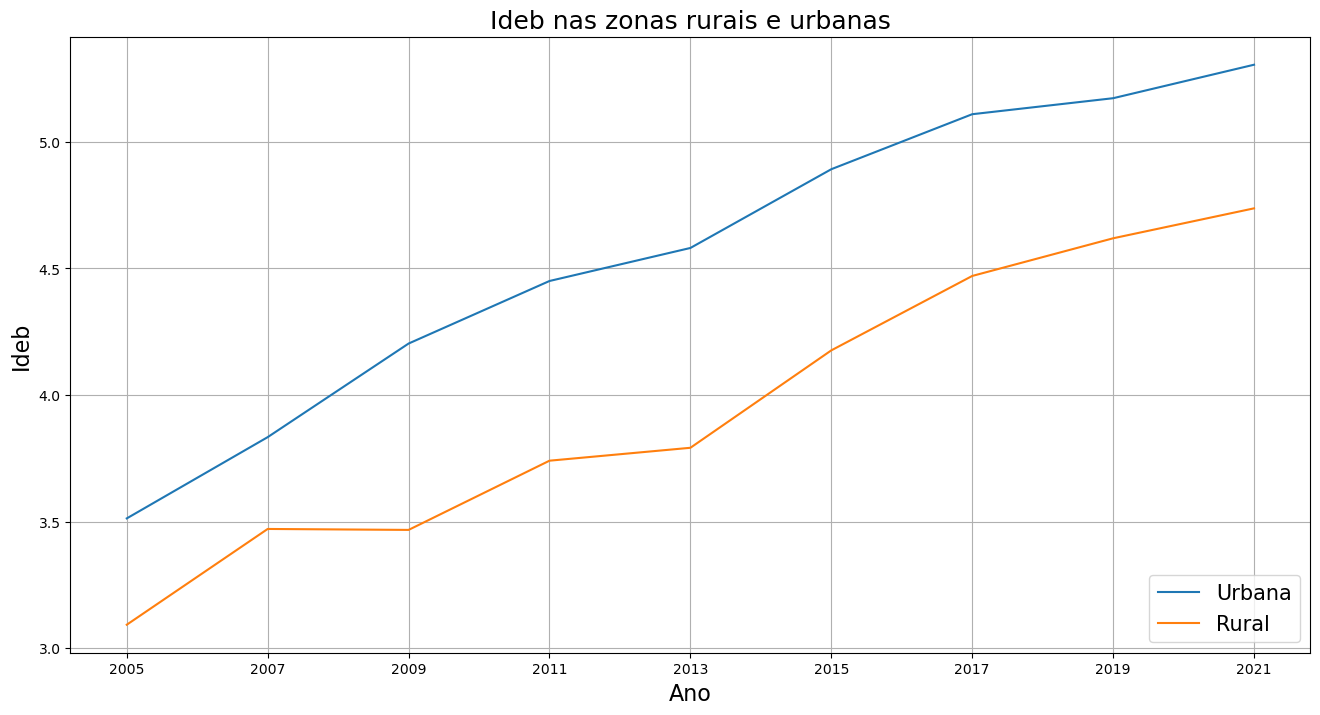

In [31]:
plotar2([df3_urb.groupby(by="ano").mean(), df3_rur.groupby(by="ano").mean()], "ideb", "Ideb nas zonas rurais e urbanas")

In [32]:
df3["rede"].unique()

array(['estadual', 'municipal', 'federal', 'privada'], dtype=object)

In [33]:
df3["ensino"].unique()

array(['fundamental', 'medio'], dtype=object)

In [34]:
df3["anos_escolares"].unique()

array(['finais (6-9)', 'iniciais (1-5)', 'todos (1-4)'], dtype=object)

In [35]:
df3["localizacao"].unique()

array(['Urbana', 'Rural'], dtype=object)

In [36]:
l_loc = df3["localizacao"].unique()
l_anos = df3["anos_escolares"].unique()
l_ens = df3["ensino"].unique()

## Públicas

p -> públcias
fi -> fundamental anos iniciais
ff -> fundamental anos finais
u -> urbanas

In [37]:
#Tabela com os índices das escolas públicas (urbanas) dos anos iniciais do ensino fundamental durante todo o período de 2005 à 2021
df_pfiu = df3[(df3["rede"] != "privada") & (df3["ensino"] == l_ens[0]) & (df3["anos_escolares"] == l_anos[1]) & (df3["localizacao"] == l_loc[0])]

In [38]:
#Tabela com os índices das escolas públicas (urbanas) dos anos finais do ensino fundamental durante todo o período de 2005 à 2021
df_pffu = df3[(df3["rede"] != "privada") & (df3["ensino"] == l_ens[0]) & (df3["anos_escolares"] == l_anos[0]) & (df3["localizacao"] == l_loc[0])]

In [39]:
#Tabela com os índices das escolas públicas (urbanas) de todos os anos do ensino médio durante todo o período de 2005 à 2021
df_pmtu = df3[(df3["rede"] != "privada") & (df3["ensino"] == l_ens[1]) & (df3["anos_escolares"] == l_anos[2]) & (df3["localizacao"] == l_loc[0])]

In [40]:
#Tabela com os índices das escolas públicas (rural) dos anos iniciais do ensino fundamental durante todo o período de 2005 à 2021
df_pfir = df3[(df3["rede"] != "privada") & (df3["ensino"] == l_ens[0]) & (df3["anos_escolares"] == l_anos[1]) & (df3["localizacao"] == l_loc[1])]

In [41]:
#Tabela com os índices das escolas públicas (rural) dos anos finais do ensino fundamental durante todo o período de 2005 à 2021
df_pffr = df3[(df3["rede"] != "privada") & (df3["ensino"] == l_ens[0]) & (df3["anos_escolares"] == l_anos[0]) & (df3["localizacao"] == l_loc[1])]

In [42]:
#Tabela com os índices das escolas públicas (rural) de todos os anos do ensino médio durante todo o período de 2005 à 2021
df_pmtr = df3[(df3["rede"] != "privada") & (df3["ensino"] == l_ens[1]) & (df3["anos_escolares"] == l_anos[2]) & (df3["localizacao"] == l_loc[1])]

# ---------------------------------------------------------------------------------------------------------------

## Privadas

p_ -> privadas
fi -> fundamental anos iniciais
ff -> fundamental anos finais
u -> urbanas

In [54]:
#Tabela com os índices das escolas privadas (urbanas) dos anos iniciais do ensino fundamental durante todo o período de 2005 à 2021
df_p_fiu = df3[(df3["rede"] == "privada") & (df3["ensino"] == l_ens[0]) & (df3["anos_escolares"] == l_anos[1]) & (df3["localizacao"] == l_loc[0])]

In [55]:
df_p_fiu

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao


In [56]:
#Tabela com os índices das escolas privadas (urbanas) dos anos finais do ensino fundamental durante todo o período de 2005 à 2021
df_p_ffu = df3[(df3["rede"] == "privada") & (df3["ensino"] == l_ens[0]) & (df3["anos_escolares"] == l_anos[0]) & (df3["localizacao"] == l_loc[0])]

In [57]:
df_p_ffu

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao


In [58]:
#Tabela com os índices das escolas privadas (urbanas) de todos os anos do ensino médio durante todo o período de 2005 à 2021
df_p_mtu = df3[(df3["rede"] == "privada") & (df3["ensino"] == l_ens[1]) & (df3["anos_escolares"] == l_anos[2]) & (df3["localizacao"] == l_loc[0])]

In [59]:
df_p_mtu

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao
29731,2017,AM,1302603,13026402,privada,medio,todos (1-4),7.6,Urbana
29905,2017,BA,2905206,29241391,privada,medio,todos (1-4),7.4,Urbana
29935,2017,BA,2909802,29454000,privada,medio,todos (1-4),7.2,Urbana
29943,2017,BA,2910800,29093619,privada,medio,todos (1-4),6.9,Urbana
29987,2017,BA,2917607,29429064,privada,medio,todos (1-4),6.6,Urbana
...,...,...,...,...,...,...,...,...,...
1027505,2017,SP,3537107,35150964,privada,medio,todos (1-4),6.2,Urbana
1027514,2017,SP,3538709,35113712,privada,medio,todos (1-4),6.2,Urbana
1027527,2017,SP,3541406,35117092,privada,medio,todos (1-4),6.2,Urbana
1027675,2017,SP,3554003,35112045,privada,medio,todos (1-4),6.2,Urbana


In [60]:
#Tabela com os índices das escolas privadas (rural) dos anos iniciais do ensino fundamental durante todo o período de 2005 à 2021
df_p_fir = df3[(df3["rede"] == "privada") & (df3["ensino"] == l_ens[0]) & (df3["anos_escolares"] == l_anos[1]) & (df3["localizacao"] == l_loc[1])]

In [61]:
df_p_fir

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao


In [62]:
#Tabela com os índices das escolas privadas (rural) dos anos finais do ensino fundamental durante todo o período de 2005 à 2021
df_p_ffr = df3[(df3["rede"] == "privada") & (df3["ensino"] == l_ens[0]) & (df3["anos_escolares"] == l_anos[0]) & (df3["localizacao"] == l_loc[1])]

In [63]:
df_p_ffr

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao


In [64]:
#Tabela com os índices das escolas privadas (rural) de todos os anos do ensino médio durante todo o período de 2005 à 2021
df_p_mtr = df3[(df3["rede"] == "privada") & (df3["ensino"] == l_ens[1]) & (df3["anos_escolares"] == l_anos[2]) & (df3["localizacao"] == l_loc[1])]

In [65]:
df_p_mtr

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,ideb,localizacao
29850,2017,AP,1600154,16006437,privada,medio,todos (1-4),2.3,Rural
531454,2017,PI,2207900,22130640,privada,medio,todos (1-4),4.5,Rural
547069,2017,GO,5215306,52082237,privada,medio,todos (1-4),5.0,Rural
548639,2017,TO,1708205,17039355,privada,medio,todos (1-4),5.0,Rural
561429,2017,PA,1507953,15084620,privada,medio,todos (1-4),5.5,Rural
622692,2017,PA,1508159,15586308,privada,medio,todos (1-4),3.9,Rural
658067,2017,MA,2105807,21378258,privada,medio,todos (1-4),4.8,Rural
672921,2017,GO,5200100,52043509,privada,medio,todos (1-4),5.3,Rural
685151,2017,MG,3138203,31246018,privada,medio,todos (1-4),5.8,Rural
685616,2017,RJ,3303906,33041563,privada,medio,todos (1-4),5.8,Rural


In [43]:
def plotar3(lista, y, titulo, nome=None, save=False):
    fig, ax = plt.subplots(figsize = (16,8))
    for data in lista:
        ax.plot(data.index.values, data[y])
    plt.title(titulo, fontsize=18)
    ax.legend(["Urbana", "Rural"], loc = "lower right", fontsize = 15)
    ax.set_xlabel("Ano", size = 16)
    ax.set_ylabel("Ideb", size = 16)
    ax.grid(True)
    if save:
        plt.savefig("C:\\Users\\Igor\\Desktop\\plots\\" + nome, dpi=300)
    plt.show()

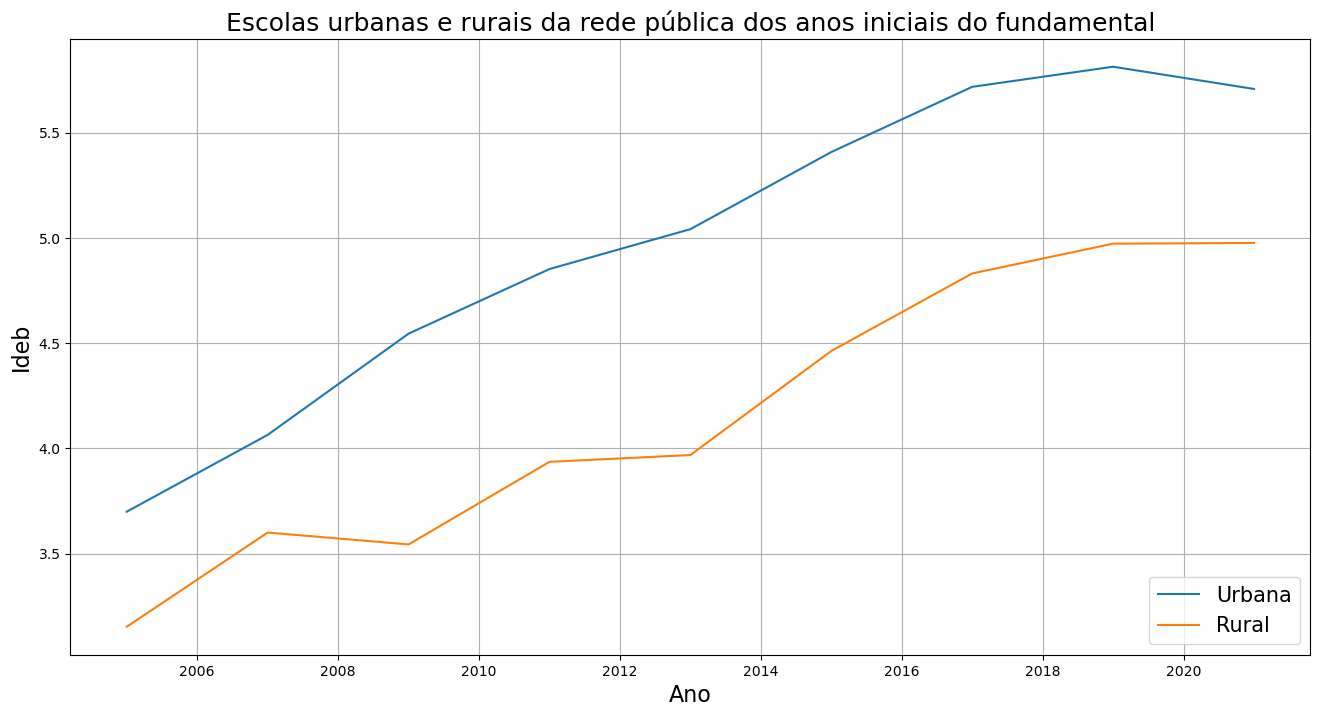

In [44]:
plotar3([df_pfiu.groupby(by="ano").mean(), df_pfir.groupby(by="ano").mean()], "ideb", "Escolas urbanas e rurais da rede pública dos anos iniciais do fundamental")

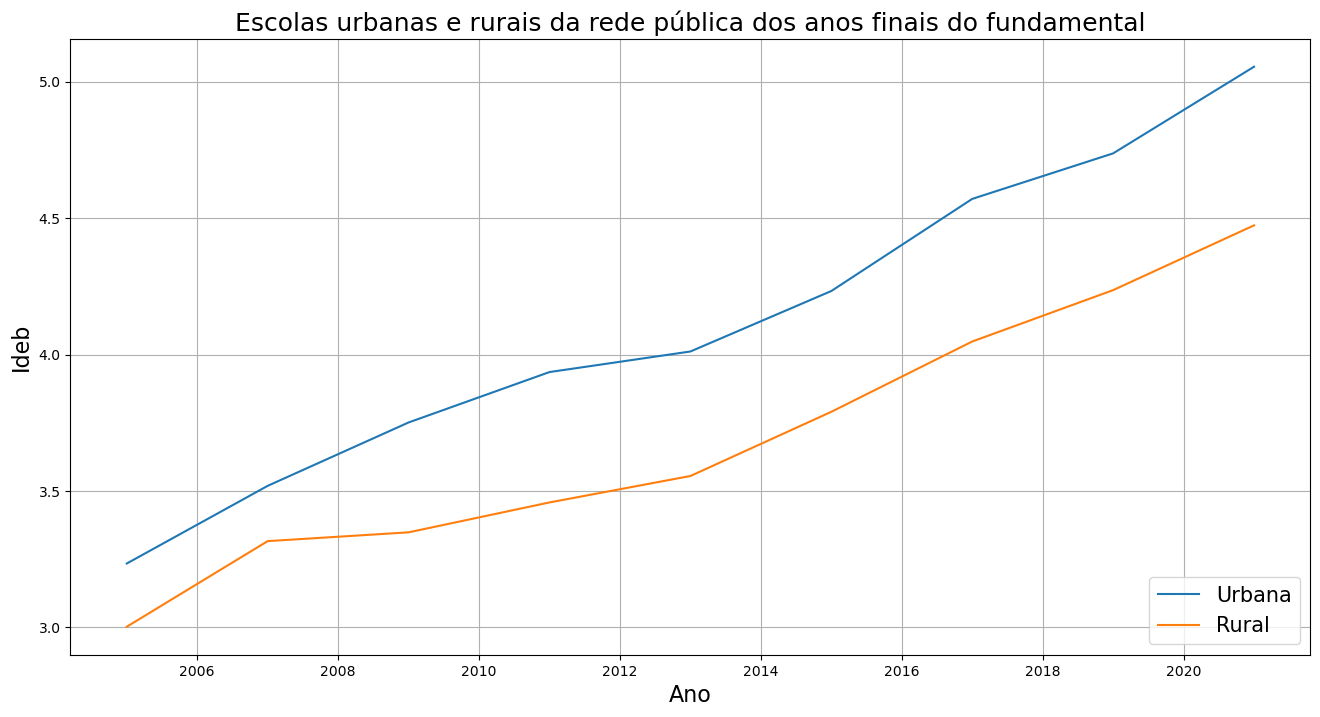

In [45]:
plotar3([df_pffu.groupby(by="ano").mean(), df_pffr.groupby(by="ano").mean()], "ideb", "Escolas urbanas e rurais da rede pública dos anos finais do fundamental")

In [67]:
df_p_mtu.groupby(by="ano").mean()

,ideb
ano,
2017,5.8115


In [68]:
df_p_mtr.groupby(by="ano").mean()

,ideb
ano,
2017,4.848


In [46]:
lista_tabelas = [df_pfiu.groupby(by="ano").mean(), df_pfir.groupby(by="ano").mean(), df_pffu.groupby(by="ano").mean(), df_pffr.groupby(by="ano").mean()]

In [47]:
lista_dif = [[],[]]

In [51]:
# Obtendo as diferenças na zona urbana e rural das escolas públicas no ensino fundamental

for n,lista in enumerate(lista_dif):
    for i in range(9):
        lista.append(round(lista_tabelas[n*2]["ideb"].iloc[i] - lista_tabelas[n*2+1]["ideb"].iloc[i], 2))

In [52]:
# Valores do eixo y para o plot

lista_dif

[[0.55, 0.46, 1.0, 0.92, 1.07, 0.95, 0.89, 0.84, 0.73],
 [0.23, 0.2, 0.4, 0.48, 0.46, 0.44, 0.52, 0.5, 0.58]]

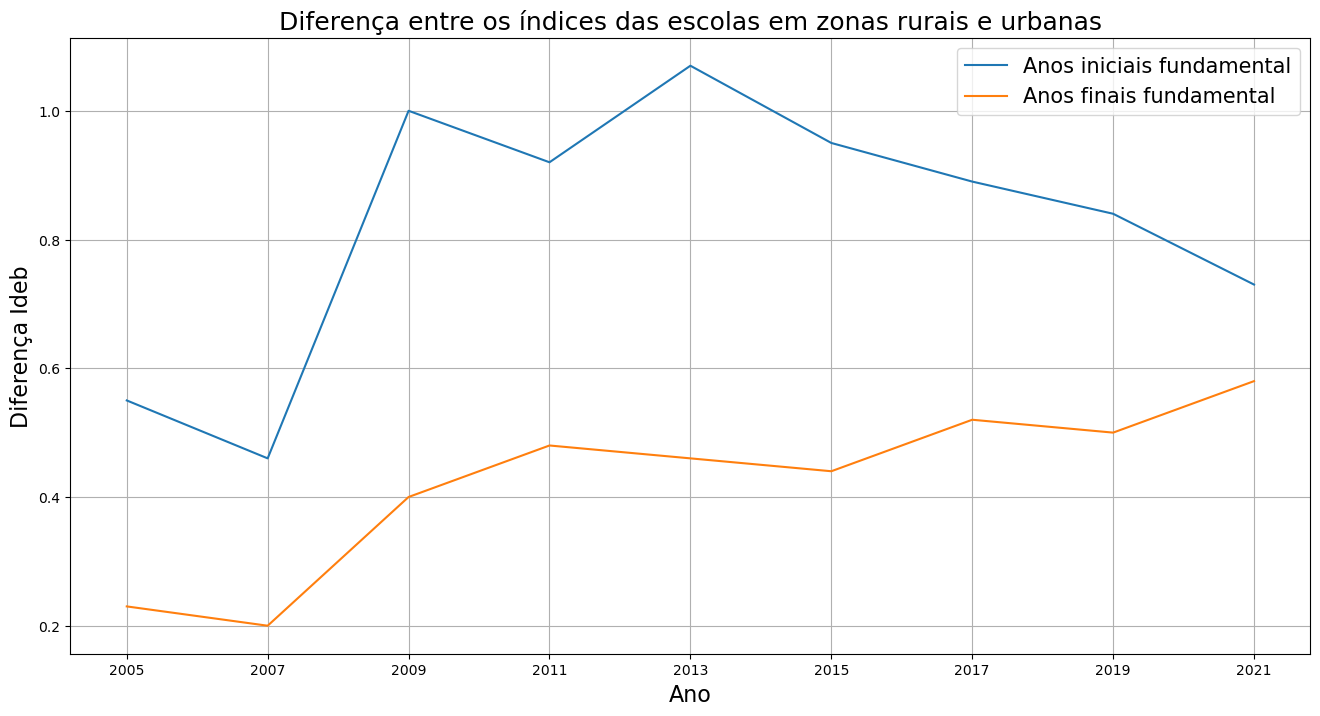

In [53]:
fig, ax = plt.subplots(figsize = (16,8))
for l in lista_dif:
    ax.plot(range(2005, 2022, 2),l)
plt.title("Diferença entre os índices das escolas em zonas rurais e urbanas", fontsize=18)
plt.xticks(range(2005, 2022, 2))
ax.legend(["Anos iniciais fundamental", "Anos finais fundamental"], loc = "upper right", fontsize = 15)
ax.set_xlabel("Ano", size = 16)
ax.set_ylabel("Diferença Ideb", size = 16)
ax.grid(True)
plt.show()

In [69]:
lista_tabelas[0]

,ideb
ano,
2005,3.699219
2007,4.064325
2009,4.545487
2011,4.852568
2013,5.042111
2015,5.408678
2017,5.718625
2019,5.814216
2021,5.708522


In [70]:
lista_tabelas[1]

,ideb
ano,
2005,3.152355
2007,3.600000
2009,3.543565
2011,3.936129
2013,3.968397
2015,4.463041
2017,4.831498
2019,4.973088
2021,4.976465


In [71]:
lista_tabelas[2]

,ideb
ano,
2005,3.234122
2007,3.518750
2009,3.750995
2011,3.935748
2013,4.011121
2015,4.232761
2017,4.570323
2019,4.737152
2021,5.054709


In [72]:
lista_tabelas[3]

,ideb
ano,
2005,3.002479
2007,3.316155
2009,3.348346
2011,3.457919
2013,3.554833
2015,3.790078
2017,4.047691
2019,4.236009
2021,4.473398
